<a href="https://colab.research.google.com/github/ccollado7/proyecto_vocales/blob/main/k_means_vocales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
!git clone https://github.com/ccollado7/proyecto_vocales.git

Cloning into 'proyecto_vocales'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 43 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), done.


Leer archivos y armar el dataset

In [5]:
cd 'proyecto_vocales/data/raw/'

/content/proyecto_vocales/data/raw


In [6]:
vocales=['A','E','I','O','U']

df=pd.DataFrame()                     
for vocal in vocales:
  df1=pd.read_csv('features_'+vocal+'.csv',header=None)
  df1['target']=vocal
  df=pd.concat([df, df1], axis=0).reset_index(drop=True)

In [7]:
df

,0,1,target
0,1002.20,1549.30,A
1,961.18,1440.70,A
2,810.06,1250.70,A
3,779.54,1214.80,A
4,948.24,1506.80,A
...,...,...,...
56,342.04,763.67,U
57,305.18,736.57,U
58,306.88,671.88,U
59,323.97,705.57,U


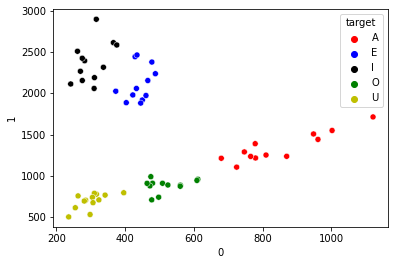

In [8]:
sns.scatterplot(x=0,y=1,hue='target',palette={'A':'r','E':'b','I':'k','O':'g','U':'y'},data=df,legend='brief')

Método kmeans

In [9]:
from sklearn.cluster import KMeans

In [10]:
X=df[[0,1]]

In [11]:
y=df[['target']]

In [12]:
kmeans = KMeans(n_clusters=5).fit(X)

In [13]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[2 2 2 2 2 2 4 2 2 2 2 2 3 1 1 1 3 1 1 1 1 1 1 3 3 3 3 1 3 1 1 3 3 3 1 3 4
 4 4 4 4 4 0 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 326.496       697.21733333]
 [ 390.96384615 2050.04615385]
 [ 860.32545455 1366.77272727]
 [ 347.98909091 2484.05454545]
 [ 544.76727273  930.04454545]]


([], <a list of 0 Text major ticklabel objects>)

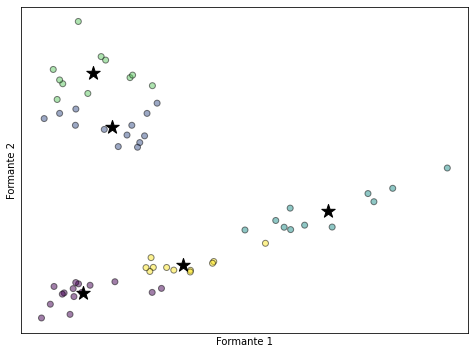

In [14]:
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(X[0], X[1],c=kmeans.labels_, alpha=.5, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('Formante 1')
plt.ylabel('Formante 2')
plt.xticks(())
plt.yticks(())

Análisis de clusters

In [15]:
tmp = pd.DataFrame({'Labels': df.target, 'Clusters': kmeans.labels_})# Create a DataFrame with labels and varieties as columns: df
ct = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Create crosstab: ct

In [16]:
print(ct)

Clusters   0  1   2  3   4
Labels                    
A          0  0  11  0   1
E          0  9   0  3   0
I          0  4   0  8   0
O          2  0   0  0  10
U         13  0   0  0   0


In [17]:
from sklearn.metrics import adjusted_rand_score
ari0 = adjusted_rand_score(df.target, kmeans.labels_)

In [18]:
print(ari0)

0.667814355479043
